In [94]:
import csv
import numpy as np
from scipy.io import wavfile # get the api
from scipy.fftpack import fft
from scipy import signal

import wave
import os
import matplotlib.pyplot as plt
import multiprocessing 
from scipy.fftpack import dct

(192000,)


Text(0.5, 1.0, 'the spectrum image')

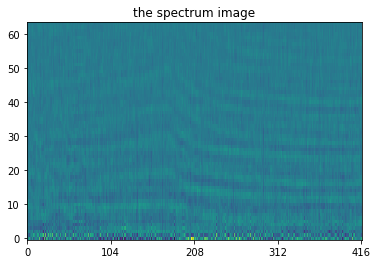

In [93]:
fs, data = wavfile.read(TRAIN_FOLDER+"92.wav") # load the data
data=data[:,0]
print(data.shape)
NFFT=1024
#f, t, Sxx = signal.spectrogram(data, fs,nfft=NFFT)

frame_size=0.25
frame_stride=0.009
#####



frame_length, frame_step = frame_size * fs, frame_stride * fs  # Convert from seconds to samples
signal_length = len(data)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(data, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

frames *= np.hamming(frame_length)

#####
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum


plt.imshow(mag_frames)


nfilt=64
num_ceps=128


low_freq_mel = 0
high_freq_mel = (2595 * np.log10(1 + (fs / 2) / 700))  # Convert Hz to Mel
mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = np.floor((NFFT + 1) * hz_points / fs)

fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = np.dot(pow_frames, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * np.log10(filter_banks)




#plt.subplot(312)
filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)

mfcc = dct(filter_banks, type=2, axis=1, norm='ortho') # Keep 2-13
plt.imshow(mfcc.T, aspect='auto')
plt.xticks(np.arange(0, (mfcc.T).shape[1],
int((mfcc.T).shape[1] / 4)))
ax = plt.gca()
ax.invert_yaxis()
plt.title('the spectrum image')



192000 48000
192000
windows size 598 576.0 300.0 8701.0
(8701, 300)


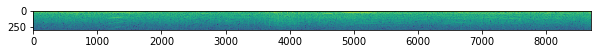

In [172]:

TARGETSampleRate=48000
eps=1e-20

sample_rate, data = wavfile.read(TRAIN_FOLDER+"92.wav")
TARGETSampleRate = sample_rate
print(len(data),sample_rate)
if data.ndim > 1 : # ignore  channels 2+
    data = data[:, 0]

pictureTimeLength = 0.15

SamplesPerPicture = pictureTimeLength * TARGETSampleRate


nTimeBin =300 # width
nFreqBin =300 # height



nperseg = 2*(nFreqBin-1)
noverlap = np.floor((SamplesPerPicture - nTimeBin*nperseg)/(1-nTimeBin))
noverlap+=1
eps=1e-10

nfbin=(nperseg/2)+1


nTbin = np.floor((len(data) - noverlap)/(nperseg -noverlap))
print(len(data))
#noverlap = int(round(step_size * TARGETSampleRate / 1e3))
freqs, times, spec = signal.spectrogram(data,fs=TARGETSampleRate,window='hann',nperseg=nperseg,noverlap=noverlap)#,scaling ='spectrum')

print("windows size",nperseg,noverlap,nfbin,nTbin)
log_specgram = np.log(spec.T.astype(np.float32) + eps)
plt.figure(figsize=(10,10))
plt.imshow(log_specgram.T)
print(log_specgram.shape)
plt.show()

In [ ]:
#nperseg = int(round(window_size * TARGETSampleRate / 1e3))
#nperseg = int(round(duration*TARGETSampleRate))
#nperseg = int(round(len(data)/300))# for 0 overlap time bins = data length defided by window count


#noverlap = int(round(nperseg/8)) # Effects number of time bins (larger overlap increases time bins)

#freqs, times, spec = signal.spectrogram(audio_data,fs=TARGETSampleRate,window='hann')#,scaling ='spectrum')




In [4]:
TRAIN_PATH= './../data/urban-sound-classification/train/'
TEST_PATH= './../data/urban-sound-classification/test/'

TRAIN_CSV = TRAIN_PATH+'train.csv'
TRAIN_FOLDER = TRAIN_PATH+'Train/'

TEST_CSV = TEST_PATH+'test.csv'
TEST_FOLDER = TEST_PATH+'Test/'

In [3]:
#dimension=224
dimension=300

In [4]:
TARGETSampleRate = 22050
n_fft = 1024
hop_length = 256
n_mels = dimension
fmin = 20
fmax = TARGETSampleRate / 2 

In [5]:
TARGETSampleRate = 22050
n_fft = 2048
hop_length = 128
n_mels = dimension
fmin = 60
fmax = TARGETSampleRate / 2 

In [6]:
OUTPUT_FOLDER_CLASSES = './data/SpecFFT2048hop128Dimen300/'

In [7]:
Labels=[]
Training_File_Dict={}
with open(TRAIN_CSV) as f:
    readCSV = csv.reader(f, delimiter=',')
    for row  in readCSV:
        if(not row[0]=='ID'):
            Training_File_Dict[row[0]]=row[1]
            if(not row[1] in Labels):
                Labels.append(row[1])

In [8]:
PathDictrionary={}
for i in Labels:
    LabeldDirectory = OUTPUT_FOLDER_CLASSES+"train/"+i+"/"
    PathDictrionary[i]=LabeldDirectory
    if not os.path.exists(LabeldDirectory):
        os.makedirs(LabeldDirectory)

In [9]:
Training_File_Dict

{'0': 'siren',
 '1': 'street_music',
 '2': 'drilling',
 '3': 'siren',
 '4': 'dog_bark',
 '6': 'children_playing',
 '10': 'street_music',
 '11': 'drilling',
 '12': 'gun_shot',
 '15': 'dog_bark',
 '17': 'engine_idling',
 '18': 'siren',
 '19': 'gun_shot',
 '20': 'engine_idling',
 '22': 'air_conditioner',
 '24': 'air_conditioner',
 '26': 'engine_idling',
 '27': 'siren',
 '32': 'children_playing',
 '33': 'jackhammer',
 '35': 'gun_shot',
 '36': 'siren',
 '37': 'jackhammer',
 '38': 'street_music',
 '40': 'jackhammer',
 '42': 'engine_idling',
 '43': 'siren',
 '44': 'children_playing',
 '45': 'jackhammer',
 '46': 'engine_idling',
 '47': 'air_conditioner',
 '48': 'car_horn',
 '49': 'drilling',
 '50': 'siren',
 '52': 'gun_shot',
 '54': 'children_playing',
 '56': 'children_playing',
 '57': 'drilling',
 '59': 'gun_shot',
 '60': 'siren',
 '61': 'car_horn',
 '63': 'drilling',
 '65': 'street_music',
 '66': 'jackhammer',
 '67': 'children_playing',
 '68': 'dog_bark',
 '71': 'dog_bark',
 '72': 'street_mu

In [10]:
### New Multithreaded

def log_mel_spec_tfm(fname, src_path, dst_path):
    global TotalCounter
    channels=[]
    sample_rate=0
    try:
        channels ,sample_rate = librosa.load(src_path,mono=False)
    except:
        print(fname+" Could not be computed!")
        return
    #print(channels.shape,fname)
    if(channels.ndim==1):
        channels= channels.reshape((1,(len(channels))))
    print(channels.shape,fname)
    channelcounter=0
    for x in channels:
        #print(x.shape,fname)
        channelcounter+=1
        audio_data = librosa.resample(x, sample_rate, TARGETSampleRate)

        mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft, 
                                                        hop_length=hop_length, 
                                                        n_mels=n_mels, power=2.0,
                                                       fmin=fmin,fmax=fmax)
        mel_spec_db = librosa.power_to_db(mel_spec_power, ref=np.max) 
        width = np.shape(mel_spec_db)[1]
        #plt.imshow(mel_spec_db)
        #print(width)
        if width >= n_mels:
            for i in range(0,int(np.floor(width/n_mels))):
                out= np.zeros(shape=(dimension,dimension))
                if((i+1)*n_mels<=width):
                    out = mel_spec_db[:,(i)*n_mels:(i+1)*n_mels]
                    im = plt.imshow(out)
                    colors = im.cmap(im.norm(out))
                    data = colors.astype(np.float64) / np.max(colors) # normalize the data to 0 - 1
                    data = 255 * data # Now scale by 255
                    img = data.astype(np.uint8)
                    out = img[:,:,0:3] 
                plt.imsave(os.path.join(dst_path,(fname.replace(".wav",'-').replace(".m4a",'-').replace(".mp3",'-') +str(i)+'-ch-'+str(channelcounter)+ '.png')), out) 
                
#log_mel_spec_tfm("1615.wav", TRAIN_FOLDER+"/1615.wav","./")
#plt.show()
#log_mel_spec_tfm("0.wav", TRAIN_FOLDER+"/0.wav","./")
#plt.show()
#return;

counter = 0
filesToProcess=[]
for filename in os.listdir(TRAIN_FOLDER):
    if counter%100==0:
        print("Prepared thus far",counter)
    if filename.endswith(".wav") or filename.endswith(".m4a") or filename.endswith(".mp3"):
        filesToProcess.append(filename)
        counter +=1
    else:
        print("skipped: "+filename)
with multiprocessing.Pool(16) as p:
    outputDir = PathDictrionary[Training_File_Dict[filename.replace(".wav","")]]
    print(outputDir)
    p.starmap(log_mel_spec_tfm, [(f,TRAIN_FOLDER+'/'+str(f),PathDictrionary[Training_File_Dict[f.replace(".wav","")]]) for f in filesToProcess])
    print("Finished The Pool")
print("Done generating Spectra!")

Prepared thus far 0
Prepared thus far 100
Prepared thus far 200
Prepared thus far 300
Prepared thus far 400
Prepared thus far 500
Prepared thus far 600
Prepared thus far 700
Prepared thus far 800
Prepared thus far 900
Prepared thus far 1000
Prepared thus far 1100
Prepared thus far 1200
Prepared thus far 1300
Prepared thus far 1400
Prepared thus far 1500
Prepared thus far 1600
Prepared thus far 1700
Prepared thus far 1800
Prepared thus far 1900
Prepared thus far 2000
Prepared thus far 2100
Prepared thus far 2200
Prepared thus far 2300
Prepared thus far 2400
Prepared thus far 2500
Prepared thus far 2600
Prepared thus far 2700
Prepared thus far 2800
skipped: 3121.png
Prepared thus far 2900
Prepared thus far 3000
Prepared thus far 3100
Prepared thus far 3200
Prepared thus far 3300
Prepared thus far 3400
Prepared thus far 3500
Prepared thus far 3600
Prepared thus far 3700
Prepared thus far 3800
Prepared thus far 3900
Prepared thus far 4000
Prepared thus far 4100
Prepared thus far 4200
Prepa

(1, 88200) 7495.wav
(2, 88200) 8377.wav
(2, 88200) 2650.wav
(2, 88200) 8108.wav
(2, 88200) 54.wav
(2, 23271) 1246.wav
(1, 88200) 8664.wav
(2, 88200) 3026.wav
(2, 88200) 3442.wav
(2, 88200) 4001.wav
(2, 88200) 3038.wav
(2, 53141) 891.wav
(2, 88200) 8441.wav
(2, 88200) 3296.wav
(2, 88200) 4004.wav
(2, 88200) 7180.wav
(2, 88200) 1310.wav
(2, 88200) 557.wav
(2, 88200) 495.wav
(2, 88200) 60.wav
(2, 88200) 1847.wav
(2, 88200) 6177.wav
(2, 48247) 7629.wav
(2, 63063) 5385.wav
(2, 17775) 7998.wav
(2, 88200) 4970.wav
(2, 88200) 3580.wav
(2, 88200) 4785.wav
(2, 88200) 2368.wav
(2, 70560) 4168.wav
(2, 88200) 8466.wav
(2, 88200) 1782.wav
(2, 31752) 2545.wav
(2, 88200) 5957.wav
(1, 88200) 3177.wav
(2, 23142) 7018.wav
(2, 88200) 2279.wav
(2, 88200) 3851.wav
(2, 88200) 7141.wav
(2, 88200) 4829.wav
(2, 88200) 5466.wav
(2, 5275) 7385.wav
(2, 88200) 2236.wav
(2, 88200) 3461.wav
(2, 88200) 6542.wav
(2, 88200) 6188.wav
(2, 88200) 5788.wav
(2, 88200) 7259.wav
(2, 15215) 6610.wav
(1, 11687) 8598.wav
(2, 8820

(2, 88200) 423.wav
(2, 88200) 464.wav
(2, 88200) 6066.wav
(2, 75852) 3056.wav
(2, 88200) 3267.wav
(2, 88200) 4645.wav
(2, 88200) 669.wav
(2, 88200) 7785.wav
(2, 27055) 418.wav
(2, 88200) 1036.wav
(2, 88200) 8628.wav
(2, 88200) 2099.wav
(2, 88200) 1919.wav
(2, 88200) 3299.wav
(2, 88200) 4837.wav
(2, 88200) 4014.wav
(2, 88200) 7916.wav
(1, 88200) 282.wav
(2, 88200) 3686.wav
(2, 76955) 5605.wav
(2, 88200) 4602.wav
(2, 88200) 7115.wav
(2, 23373) 5553.wav
(2, 66301) 4704.wav
(2, 28004) 4716.wav
(1, 61079) 5241.wav
(2, 88200) 8570.wav
(2, 88200) 8508.wav
(2, 88200) 7988.wav
(2, 8600) 1768.wav
(2, 88200) 1251.wav
(2, 88200) 7742.wav
(2, 88200) 3214.wav
(2, 88200) 6956.wav
(2, 88200) 7068.wav
(2, 88200) 2055.wav
(2, 88200) 7185.wav
(2, 88200) 455.wav
(2, 88200) 714.wav
(1, 88200) 512.wav
(2, 88200) 461.wav
(2, 88200) 1347.wav
(2, 88200) 3776.wav
(1, 88200) 2646.wav
(1, 34839) 179.wav
(1, 88200) 8047.wav
(2, 88200) 400.wav
(2, 9923) 5654.wav
(2, 88200) 3783.wav
(2, 88200) 5701.wav
(2, 88200) 16

(2, 88200) 5572.wav
(2, 88200) 6205.wav
(2, 88200) 2788.wav
(2, 38147) 2644.wav
(2, 88200) 4198.wav
(2, 23933) 4959.wav
(2, 88200) 7017.wav
(2, 88200) 7412.wav
(2, 88200) 2925.wav
(2, 88200) 5348.wav
(2, 88200) 3645.wav
(2, 88200) 4224.wav
(2, 88200) 7784.wav
(2, 88200) 7221.wav
(2, 88200) 87.wav
(2, 88200) 8540.wav
(2, 88200) 7978.wav
(2, 88200) 8694.wav
(2, 88200) 635.wav
(2, 18302) 1511.wav
(2, 88200) 276.wav
(2, 20935) 7205.wav
(2, 88200) 978.wav
(2, 13393) 7337.wav
(2, 88200) 1569.wav
(2, 88200) 6493.wav
(2, 88200) 3281.wav
(1, 88200) 6703.wav
(2, 87098) 4703.wav
(2, 88200) 4481.wav
(1, 4190) 7151.wav
(2, 88200) 1423.wav
(2, 88200) 2260.wav
(2, 88200) 5005.wav
(2, 88200) 2850.wav
(2, 88200) 7503.wav
(2, 88200) 2369.wav
(2, 88200) 1831.wav
(1, 88200) 5988.wav
(2, 88200) 8483.wav
(2, 9192) 6901.wav
(2, 88200) 6151.wav
(2, 7497) 364.wav
(2, 88200) 1864.wav
(2, 88200) 7426.wav
(2, 88200) 6574.wav
(1, 88200) 5487.wav
(2, 24225) 5713.wav
(1, 17640) 1353.wav
(2, 88200) 2697.wav
(2, 88200

(2, 32634) 2193.wav
(2, 88200) 1889.wav
(2, 88200) 7020.wav
(2, 88200) 1686.wav
(2, 88200) 659.wav
(1, 88200) 7538.wav
(2, 88200) 1914.wav
(2, 59094) 4408.wav
(2, 88200) 3014.wav
(2, 88200) 6958.wav
(2, 88200) 3659.wav
(2, 88200) 2029.wav
(2, 88200) 7375.wav
(2, 88200) 6860.wav
(2, 88200) 2430.wav
(2, 88200) 5417.wav
(1, 88200) 8289.wav
(2, 88200) 4353.wav
(2, 88200) 4464.wav
(2, 34398) 2295.wav
(2, 88200) 825.wav
(2, 88200) 1298.wav
(2, 88200) 2441.wav
(2, 88200) 45.wav
(2, 88200) 971.wav
(2, 88200) 6580.wav
(2, 88200) 7316.wav
(2, 88200) 1305.wav
(2, 88200) 3160.wav
(2, 15370) 4622.wav
(2, 88200) 3388.wav
(2, 88200) 2174.wav
(2, 88200) 8562.wav
(2, 88200) 590.wav
(2, 88200) 2664.wav
(2, 88200) 377.wav
(2, 40352) 383.wav
(2, 88200) 4661.wav
(2, 88200) 8564.wav
(2, 88200) 6641.wav
(2, 88200) 597.wav
(2, 88200) 5865.wav
(2, 47187) 1418.wav
(2, 88200) 3297.wav
(2, 88200) 834.wav
(2, 88200) 1523.wav
(2, 88200) 3432.wav
(2, 88200) 8366.wav
(2, 88200) 7860.wav
(2, 88200) 3751.wav
(1, 88200)

(2, 88200) 3310.wav
(2, 88200) 3099.wav
(2, 88200) 5175.wav
(2, 88200) 6609.wav
(2, 88200) 4076.wav
(2, 61299) 5357.wav
(2, 25358) 1649.wav
(2, 88200) 6732.wav
(1, 88200) 3143.wav
(2, 88200) 3324.wav
(2, 88200) 2197.wav
(2, 88200) 5088.wav
(2, 88200) 5684.wav
(2, 88200) 1573.wav
(2, 88200) 6116.wav
(2, 88200) 8643.wav
(2, 88200) 5557.wav
(2, 88200) 1908.wav
(2, 88200) 5731.wav
(2, 41599) 2204.wav
(2, 88200) 3433.wav
(2, 88200) 3621.wav
(2, 88200) 1151.wav
(2, 88200) 4826.wav
(2, 88200) 6346.wav
(2, 15155) 573.wav
(2, 4325) 8088.wav
(2, 88200) 746.wav
(2, 88200) 1312.wav
(2, 88200) 3434.wav
(2, 88200) 2447.wav
(2, 88200) 1399.wav
(2, 88200) 5188.wav
(2, 88200) 7776.wav
(1, 88200) 4755.wav
(2, 88200) 1548.wav
(2, 88200) 258.wav
(2, 88200) 6004.wav
(2, 88200) 6662.wav
(2, 88200) 4372.wav
(2, 88200) 5019.wav
(2, 88200) 134.wav
(2, 88200) 5022.wav
(2, 41855) 5762.wav
(2, 88200) 878.wav
(2, 53361) 854.wav
(1, 88200) 4193.wav
(2, 88200) 7240.wav
(2, 88200) 3606.wav
(2, 88200) 6520.wav
(1, 882

(2, 88200) 7995.wav
(2, 88200) 4093.wav
(2, 30990) 7871.wav
(2, 88200) 6462.wav
(2, 88200) 3104.wav
(2, 29321) 8657.wav
(2, 88200) 2996.wav
(2, 88200) 2578.wav
(1, 50662) 163.wav
(2, 55913) 6206.wav
(2, 88200) 901.wav
(2, 88200) 4058.wav
(2, 88200) 7096.wav
(2, 88200) 3914.wav
(2, 88200) 2918.wav
(2, 88200) 81.wav
(2, 88200) 1593.wav
(2, 88200) 4374.wav
(2, 88200) 6716.wav
(2, 88200) 7648.wav
(2, 88200) 2506.wav
(2, 88200) 584.wav
(2, 88200) 4566.wav
(2, 88200) 1738.wav
(1, 88200) 4184.wav
(1, 88200) 2290.wav
(2, 88200) 2339.wav
(2, 88200) 5813.wav
(1, 36824) 2927.wav
(2, 88200) 1329.wav
(1, 88200) 7700.wav
(2, 88200) 3469.wav
(2, 88200) 2926.wav
(2, 88200) 5942.wav
(2, 2137) 8050.wav
(2, 88200) 5837.wav
(2, 11687) 1350.wav
(2, 81099) 5412.wav
(2, 88200) 6547.wav
(2, 88200) 4392.wav
(2, 64088) 5165.wav
(2, 88200) 7769.wav
(2, 88200) 8599.wav
(2, 88200) 7217.wav
(2, 88200) 4411.wav
(2, 88200) 899.wav
(2, 88200) 1820.wav
(2, 88200) 1068.wav
(2, 88200) 6565.wav
(2, 88200) 4917.wav
(2, 882

(2, 88200) 7688.wav
(2, 48731) 3279.wav
(2, 65930) 2989.wav
(2, 88200) 1394.wav
(2, 88200) 5992.wav
(2, 88200) 4160.wav
(2, 88200) 564.wav
(2, 28224) 202.wav
(2, 22655) 8646.wav
(2, 31215) 4742.wav
(2, 88200) 3150.wav
(2, 88200) 6162.wav
(2, 88200) 4400.wav
(2, 88200) 5566.wav
(2, 88200) 4663.wav
(2, 88200) 5067.wav
(2, 88200) 6378.wav
(2, 88200) 4417.wav
(2, 88200) 2121.wav
(2, 88200) 1240.wav
(2, 88200) 1968.wav
(2, 88200) 3714.wav
(2, 88200) 750.wav
(2, 88200) 7914.wav
(2, 88200) 452.wav
(2, 88200) 8317.wav
(2, 88200) 3078.wav
(2, 66591) 7725.wav
(2, 88200) 8560.wav
(2, 17361) 6098.wav
(2, 88200) 7201.wav
(2, 88200) 4078.wav
(2, 88200) 7833.wav
(2, 88200) 4084.wav
(1, 15842) 8148.wav
(2, 88200) 4820.wav
(2, 88200) 6752.wav
(2, 88200) 6760.wav
(2, 88200) 6607.wav
(2, 88200) 8627.wav
(2, 88200) 4474.wav
(2, 88200) 2994.wav
(2, 88200) 8618.wav
(2, 88200) 2863.wav
(2, 88200) 4054.wav
(2, 88200) 3680.wav
(2, 31708) 8518.wav
(2, 88200) 4506.wav
(2, 88200) 5523.wav
(2, 88200) 3399.wav
(2, 

(1, 88200) 3206.wav
(2, 88200) 8110.wav
(2, 88200) 2358.wav
(2, 10995) 7882.wav
(2, 88200) 4234.wav
(2, 49147) 7053.wav
(2, 88200) 8002.wav
(2, 88200) 4191.wav
(2, 88200) 8090.wav
(2, 88200) 5129.wav
(2, 88200) 6297.wav
(2, 88200) 8552.wav
(2, 88200) 3781.wav
(2, 88200) 1725.wav
(2, 44460) 807.wav
(2, 88200) 7280.wav
(2, 88200) 4316.wav
(2, 88200) 3239.wav
(2, 88200) 965.wav
(2, 88200) 2418.wav
(2, 88200) 7359.wav
(2, 67835) 7977.wav
(2, 88200) 368.wav
(2, 88200) 4390.wav
(2, 88200) 6999.wav
(2, 62622) 4739.wav
(2, 13816) 313.wav
(2, 13451) 3626.wav
(2, 88200) 1512.wav
(2, 88200) 6837.wav
(2, 88200) 1819.wav
(2, 88200) 1481.wav
(2, 88200) 3675.wav
(2, 88200) 6836.wav
(2, 22271) 2730.wav
(2, 88200) 4267.wav
(2, 88200) 6749.wav
(2, 88200) 4444.wav
(2, 88200) 4009.wav
(2, 88200) 2936.wav
(2, 88200) 1817.wav
(2, 88200) 5390.wav
(2, 88200) 3519.wav
(2, 88200) 778.wav
(2, 88200) 4254.wav
(2, 88200) 1143.wav
(2, 88200) 8103.wav
(2, 88200) 7842.wav
(1, 88200) 6629.wav
(2, 88200) 8142.wav
(2, 8

(2, 17861) 5712.wav
(2, 88200) 5128.wav
(2, 88200) 7213.wav
(2, 88200) 6530.wav
(2, 88200) 8133.wav
(2, 88200) 6241.wav
(2, 88200) 4648.wav
(2, 88200) 2669.wav
(2, 88200) 49.wav
(2, 88200) 7124.wav
(1, 26457) 218.wav
(2, 88200) 6014.wav
(2, 88200) 524.wav
(2, 46080) 5481.wav
(2, 88200) 593.wav
(2, 88200) 600.wav
(2, 9026) 3012.wav
(2, 88200) 7543.wav
(2, 88200) 7284.wav
(2, 88200) 8514.wav
(2, 88200) 2878.wav
(2, 88200) 7806.wav
(1, 88200) 6883.wav
(1, 88200) 713.wav
(2, 88200) 6977.wav
(2, 88200) 6638.wav
(2, 88200) 6083.wav
(2, 88200) 3105.wav
(2, 88200) 5628.wav
(2, 88200) 5735.wav
(2, 88200) 1028.wav
(2, 88200) 3909.wav
(2, 88200) 1922.wav
(2, 88200) 5687.wav
(2, 88200) 121.wav
(2, 88200) 6191.wav
(2, 88200) 6002.wav
(2, 88200) 6648.wav
(2, 88200) 7992.wav
(2, 88200) 727.wav
(1, 88200) 2206.wav
(2, 88200) 6823.wav
(2, 88200) 337.wav
(2, 88200) 84.wav
(2, 88200) 2366.wav
(2, 88200) 5518.wav
(2, 88200) 7292.wav
(2, 88200) 3037.wav
(2, 88200) 7561.wav
(2, 88200) 1801.wav
(2, 88200) 71

(2, 88200) 6949.wav
(2, 88200) 6653.wav
(2, 88200) 5382.wav
(2, 88200) 1745.wav
(2, 88200) 7087.wav
(2, 88200) 4328.wav
(2, 88200) 280.wav
(2, 27033) 285.wav
(2, 88200) 4776.wav
(1, 88200) 8062.wav
(2, 49080) 5773.wav
(2, 88200) 642.wav
(2, 88200) 3925.wav
(2, 88200) 4130.wav
(2, 88200) 7829.wav
(2, 88200) 4382.wav
(1, 88200) 8282.wav
(2, 88200) 1695.wav
(2, 19340) 8605.wav
(2, 88200) 6490.wav
(2, 88200) 4438.wav
(2, 88200) 2901.wav
(2, 88200) 7294.wav
(2, 88200) 6165.wav
(2, 88200) 4795.wav
(2, 88200) 3165.wav
(2, 34839) 5716.wav
(2, 88200) 6392.wav
(2, 88200) 4781.wav
(2, 14506) 6053.wav
(2, 88200) 8534.wav
(2, 88200) 4637.wav
(2, 76073) 528.wav
(2, 88200) 5270.wav
(2, 88200) 1929.wav
(2, 88200) 3270.wav
(2, 88200) 1390.wav
(2, 88200) 2892.wav
(2, 88200) 2378.wav
(2, 88200) 2637.wav
(2, 88200) 3646.wav
(1, 88200) 7669.wav
(1, 10755) 5181.wav
(2, 4631) 6543.wav
(1, 88200) 757.wav
(1, 88200) 6224.wav
(2, 88200) 5586.wav
(2, 88200) 4989.wav
(2, 88200) 4828.wav
(2, 88200) 6382.wav
(2, 23

(2, 88200) 1932.wav
(2, 88200) 7072.wav
(2, 88200) 1458.wav
(2, 88200) 3422.wav
(2, 88200) 1828.wav
(2, 88200) 6878.wav
(2, 88200) 892.wav
(2, 88200) 7476.wav
(2, 88200) 8013.wav
(2, 88200) 3896.wav
(2, 61740) 5927.wav
(2, 4574) 4429.wav
(2, 88200) 3529.wav
(2, 88200) 5331.wav
(2, 88200) 2610.wav
(2, 88200) 5977.wav
(2, 33013) 3548.wav
(2, 88200) 5741.wav
(2, 88200) 1633.wav
(2, 88200) 8100.wav
(2, 88200) 4235.wav
(2, 88200) 5214.wav
(2, 88200) 8073.wav
(2, 88200) 3985.wav
(2, 88200) 3112.wav
(2, 88200) 8535.wav
(2, 88200) 1714.wav
(1, 9621) 5912.wav
(2, 88200) 5616.wav
(2, 88200) 2103.wav
(2, 88200) 8613.wav
(2, 88200) 7694.wav
(2, 88200) 7057.wav
(2, 88200) 1321.wav
(2, 63284) 1841.wav
(2, 88200) 3808.wav
(2, 88200) 3972.wav
(2, 88200) 1515.wav
(2, 88200) 7733.wav
(2, 88200) 6450.wav
(2, 88200) 8701.wav
(2, 88200) 6726.wav
(2, 88200) 7710.wav
(2, 88200) 7319.wav
(2, 88200) 6824.wav
(2, 88200) 4617.wav
(2, 88200) 4904.wav
(1, 9667) 2080.wav
(2, 88200) 2595.wav
(2, 33884) 7523.wav
(2, 

(2, 88200) 6296.wav
(2, 47849) 6012.wav
(2, 88200) 7067.wav
(2, 88200) 1367.wav
(1, 88200) 4003.wav
(2, 88200) 253.wav
(2, 88200) 1492.wav
(2, 88200) 5221.wav
(2, 57330) 607.wav
(2, 88200) 3081.wav
(2, 88200) 7025.wav
(2, 88200) 5699.wav
(2, 88200) 5323.wav
(2, 88200) 4822.wav
(2, 88200) 8473.wav
(2, 88200) 5503.wav
(2, 88200) 3316.wav
(2, 38367) 709.wav
(2, 88200) 2587.wav
(2, 88200) 310.wav
(2, 88200) 7403.wav
(2, 88200) 3250.wav
(2, 88200) 645.wav
(2, 88200) 5234.wav
(2, 88200) 7249.wav
(2, 88200) 4222.wav
(2, 88200) 2293.wav
(2, 88200) 717.wav
(2, 88200) 2652.wav
(1, 88200) 6173.wav
(2, 88200) 7619.wav
(2, 88200) 631.wav
(1, 88375) 3190.wav
(2, 88200) 7015.wav
(2, 88200) 5065.wav
(1, 88200) 3666.wav
(2, 88200) 1555.wav
(2, 88200) 6336.wav
(2, 51156) 4189.wav
(2, 88200) 4006.wav
(1, 88200) 7721.wav
(2, 88200) 1139.wav
(2, 88200) 2078.wav
(2, 88200) 4692.wav
(2, 88200) 7040.wav
(2, 88200) 2219.wav
(2, 18302) 2179.wav
(2, 15876) 3070.wav
(2, 88200) 8194.wav
(2, 88200) 7432.wav
(2, 882

(2, 88200) 5069.wav
(2, 88200) 4288.wav
(2, 88200) 3550.wav
(2, 88200) 6149.wav
(2, 88200) 8682.wav
(2, 88200) 79.wav
(2, 88200) 2597.wav
(2, 88200) 324.wav
(2, 88200) 8695.wav
(2, 88200) 5277.wav
(2, 88200) 4763.wav
(2, 33957) 5281.wav
(2, 88200) 7307.wav
(2, 88200) 5876.wav
(2, 88200) 7597.wav
(2, 88200) 7723.wav
(2, 88200) 3583.wav
(2, 88200) 4784.wav
(2, 88200) 5769.wav
(2, 88200) 5077.wav
(2, 88200) 576.wav
(2, 88200) 840.wav
(2, 88200) 3973.wav
(1, 16452) 7585.wav
(2, 88200) 8314.wav
(2, 88200) 1242.wav
(2, 88200) 77.wav
(2, 50715) 2042.wav
(2, 88200) 8469.wav
(1, 88200) 6370.wav
(2, 88200) 824.wav
(2, 88200) 1112.wav
(2, 88200) 594.wav
(2, 88200) 4227.wav
(2, 88200) 2186.wav
(2, 88200) 5548.wav
(1, 88200) 6973.wav
(2, 88200) 3670.wav
(2, 88200) 3551.wav
(2, 88200) 5897.wav
(2, 88200) 247.wav
(2, 88200) 4286.wav
(2, 88200) 6366.wav
(2, 88200) 720.wav
(2, 88200) 6255.wav
(2, 88200) 7946.wav
(2, 88200) 8705.wav
(2, 88200) 4960.wav
(2, 88200) 4873.wav
(2, 88200) 8513.wav
(1, 88200) 

In [91]:
counter

5435

In [ ]:
for i in range(0,2):
    print(i)